In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline
import seaborn as sns

In [79]:
trainData = pd.read_csv("train.csv") 



In [80]:
#All the numerical variables:
    MSSubClass 
    LotFrontage:  outlier value > 300
            :259 missing value - replace with median 
    LotArea     : outlier > 100.000     
    YearBuilt        
    YearRemodAdd     
    MasVnrArea   : extreme value are > 1100
                 to do : why these exists   
    BsmtFinSF1       
    BsmtFinSF2   
    BsmtUnfSF
    TotalBsmtSF      
    1stFlrSF         
    LowQualFinSF     
    GrLivArea        
    FullBath  
    HalfBath     
    BedroomAbvGr  
    KitchenAbvGr   
    TotRmsAbvGrd   
    Fireplaces     
    GarageYrBlt      
    GarageCars       
    GarageArea       
    WoodDeckSF       
    OpenPorchSF      
    EnclosedPorch    
    3SsnPorch        
    ScreenPorch      
    PoolArea         
    MiscVal          
    MoSold           
    YrSold           
    

IndentationError: unexpected indent (<ipython-input-80-f70985add1c7>, line 2)

In [81]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [82]:
pd.set_option('display.max_columns', None)
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [83]:
sub_df = trainData[trainData['MasVnrArea'].isnull()]
print(sub_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
936    937          20       RL         67.0    10083   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       

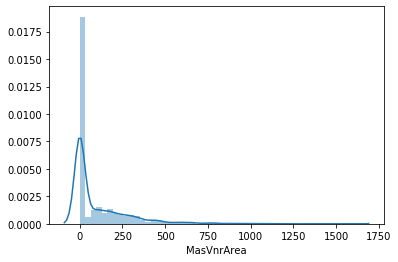

In [84]:
sns.distplot(trainData['MasVnrArea'].fillna(102))

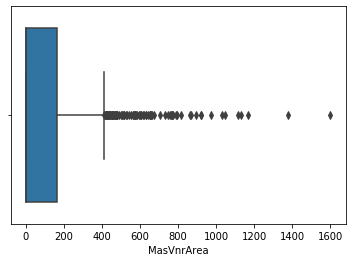

In [85]:
sns.boxplot(trainData['MasVnrArea'].fillna(102))

In [86]:
trainData['MasVnrArea'].value_counts()
# we are using MasVnrType using as exist or not exists  as 0 or 1

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [87]:
sub_df = trainData[trainData['MasVnrArea'].isnull()]

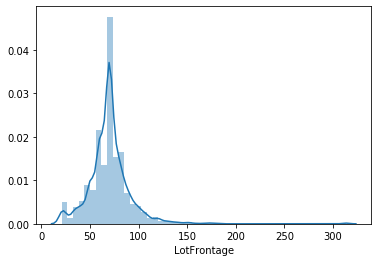

In [88]:
sns.distplot(trainData['LotFrontage'].fillna(70))

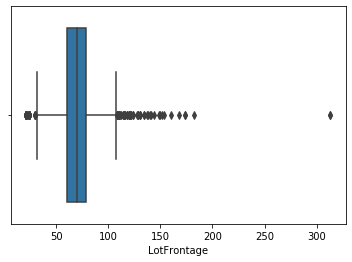

In [89]:
sns.boxplot(trainData['LotFrontage'].fillna(70))

In [90]:
trainData['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [91]:
sub_df = trainData[trainData['LotFrontage'].isnull()]
print (sub_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1429  1430          20       RL          NaN    12546   Pave   NaN      IR1   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neig

In [92]:
sub_df['Street'].value_counts()

Pave    258
Grvl      1
Name: Street, dtype: int64

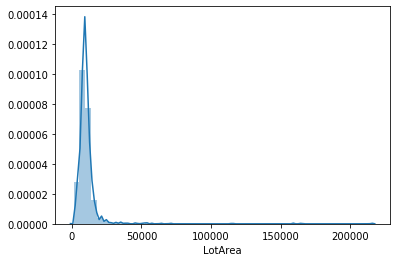

In [93]:
sns.distplot(trainData['LotArea'])

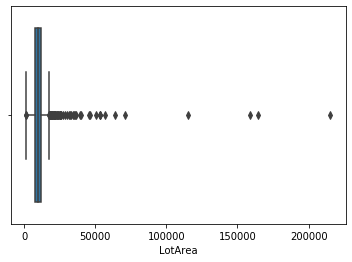

In [94]:
sns.boxplot(trainData['LotArea'])

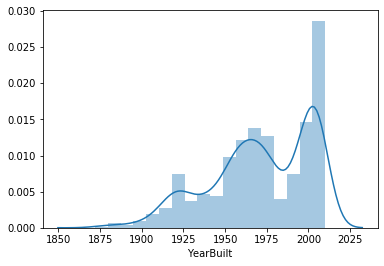

In [95]:
sns.distplot(trainData['YearBuilt'])

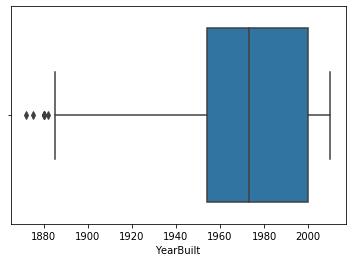

In [96]:
sns.boxplot(trainData['YearBuilt'])

In [97]:
X_train = trainData[['LotFrontage', 'LotArea', 'YearBuilt']]
X_train.head()
X_train.describe()

,LotFrontage,LotArea,YearBuilt
count,1201.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808
std,24.284752,9981.264932,30.202904
min,21.000000,1300.000000,1872.000000
25%,59.000000,7553.500000,1954.000000
50%,69.000000,9478.500000,1973.000000
75%,80.000000,11601.500000,2000.000000
max,313.000000,215245.000000,2010.000000


In [98]:
Y_train = trainData['SalePrice']

Y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
regression_model.score(X = X_train, 
                       y = Y_train)

In [39]:
d = trainData.copy()
tdf = d.drop(d[trainData.LotFrontage > 300].index)
tdf.info()

X_df = trainData.copy()
X_df = X_df[X_df.LotArea < 100000]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-n

In [100]:
X_train['LotFrontage'].fillna(70,inplace=True)
X_train['YearBuilt'] = X_train['YearBuilt'].apply(lambda x:(2019-x))


C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
X_train = tdf[['LotFrontage', 'LotArea', 'YearBuilt']]
X_train.head()
X_train.describe()

Y_train = trainData['SalePrice']

Y_train.head()

X_train['LotFrontage'].fillna(70,inplace=True)
X_train['YearBuilt'] = X_train['YearBuilt'].apply(lambda x:(2019-x))


C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [120]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

ValueError: Found input variables with inconsistent numbers of samples: [1, 1460]

In [103]:
regression_model.score(X = X_train, 
                       y = Y_train)

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

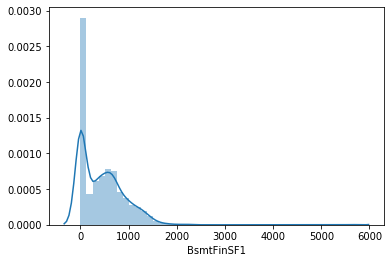

In [104]:
sns.distplot(trainData['BsmtFinSF1'])

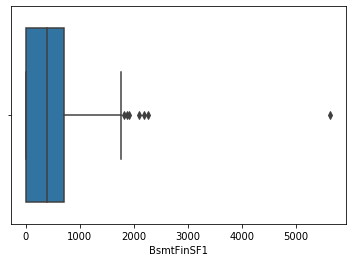

In [105]:
sns.boxplot(trainData['BsmtFinSF1'])

In [121]:
d = trainData.copy()
olFilter = trainData.LotArea > 100000
udf = d.drop(d[olFilter].index)
oolFilter = trainData.LotFrontage > 300
udf = d.drop(d[oolFilter].index)
ooolFilter = trainData.BsmtFinSF1 < 3000
udf = d.drop(d[ooolFilter].index)
udf.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1298 to 1298
Data columns (total 81 columns):
Id               1 non-null int64
MSSubClass       1 non-null int64
MSZoning         1 non-null object
LotFrontage      1 non-null float64
LotArea          1 non-null int64
Street           1 non-null object
Alley            0 non-null object
LotShape         1 non-null object
LandContour      1 non-null object
Utilities        1 non-null object
LotConfig        1 non-null object
LandSlope        1 non-null object
Neighborhood     1 non-null object
Condition1       1 non-null object
Condition2       1 non-null object
BldgType         1 non-null object
HouseStyle       1 non-null object
OverallQual      1 non-null int64
OverallCond      1 non-null int64
YearBuilt        1 non-null int64
YearRemodAdd     1 non-null int64
RoofStyle        1 non-null object
RoofMatl         1 non-null object
Exterior1st      1 non-null object
Exterior2nd      1 non-null object
MasVnrType       1 non-n

In [122]:
X_train = udf[['LotFrontage', 'LotArea', 'YearBuilt','BsmtFinSF1']]
X_train.head()
X_train.describe()

,LotFrontage,LotArea,YearBuilt,BsmtFinSF1
count,1.0,1.0,1.0,1.0
mean,313.0,63887.0,2008.0,5644.0
std,NaN,NaN,NaN,NaN
min,313.0,63887.0,2008.0,5644.0
25%,313.0,63887.0,2008.0,5644.0
50%,313.0,63887.0,2008.0,5644.0
75%,313.0,63887.0,2008.0,5644.0
max,313.0,63887.0,2008.0,5644.0


In [123]:
Y_train = trainData['SalePrice']

Y_train.head()
X_train['YearBuilt'] = X_train['YearBuilt'].apply(lambda x:(2019-x))

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [124]:
X_train['LotFrontage'].fillna(70,inplace=True)

C:\Users\akash\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [125]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

#data=data.reshape((1460,1))

ValueError: Found input variables with inconsistent numbers of samples: [1, 1460]

In [67]:
regression_model.score(X = X_train, 
                       y = Y_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.